In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

In [4]:
df=pd.read_csv(r'D:\data science\7)machine learning\projects\4-calories\calories.csv')

In [5]:
df.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [20]:
df_details=pd.read_csv(r'D:\data science\7)machine learning\projects\4-calories\exercise.csv')

In [21]:
df_details.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [24]:
Calories_data=pd.concat([df_details,df['Calories']],axis=1)
Calories_data

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5   

       Calories  
0         231.0  
1          66.0  
2          26.0  
3          71.0  
4          35.0  
...         ...  
14995      45.0  
14996      23.0  
14997      75.0  
14998      11.0  
14999      98.0  

[15000 rows x 9 columns]

In [42]:
Calories_data['Gender']=Calories_data['Gender'].replace({'male':1,'female':0})

C:\Users\Mohamed Hagag\AppData\Local\Temp\ipykernel_11764\4063166134.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Calories_data['Gender']=Calories_data['Gender'].replace({'male':1,'female':0})


In [43]:
Calories_data.head(2)

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       1   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       0   20   166.0    60.0      14.0        94.0       40.3   

   Calories  
0     231.0  
1      66.0

In [25]:
Calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [26]:
Calories_data.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

In [27]:
Calories_data.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

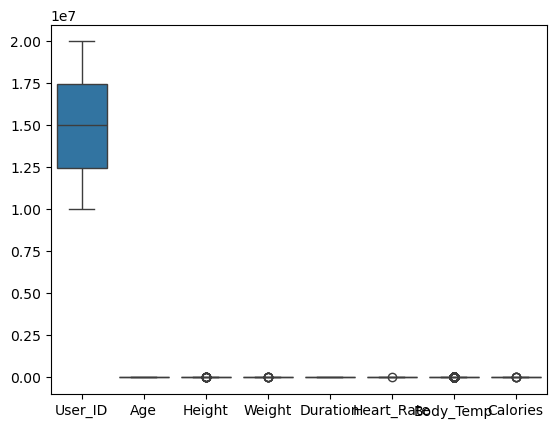

In [28]:
sns.boxplot(Calories_data)
plt.show()

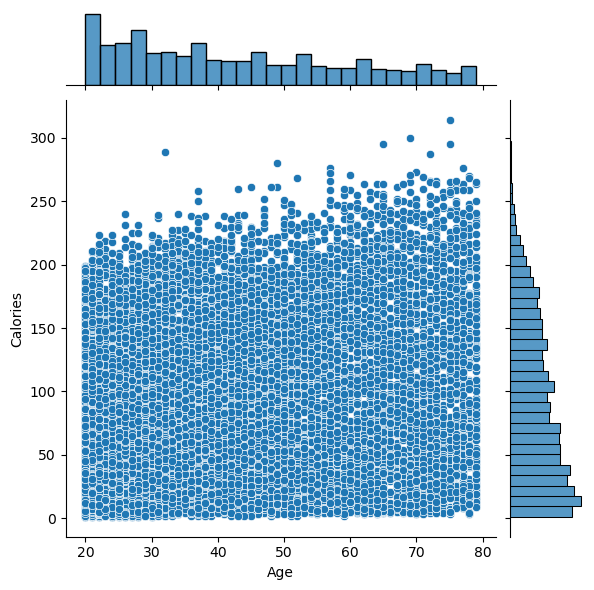

In [30]:
sns.jointplot(x='Age',y='Calories',data=Calories_data)

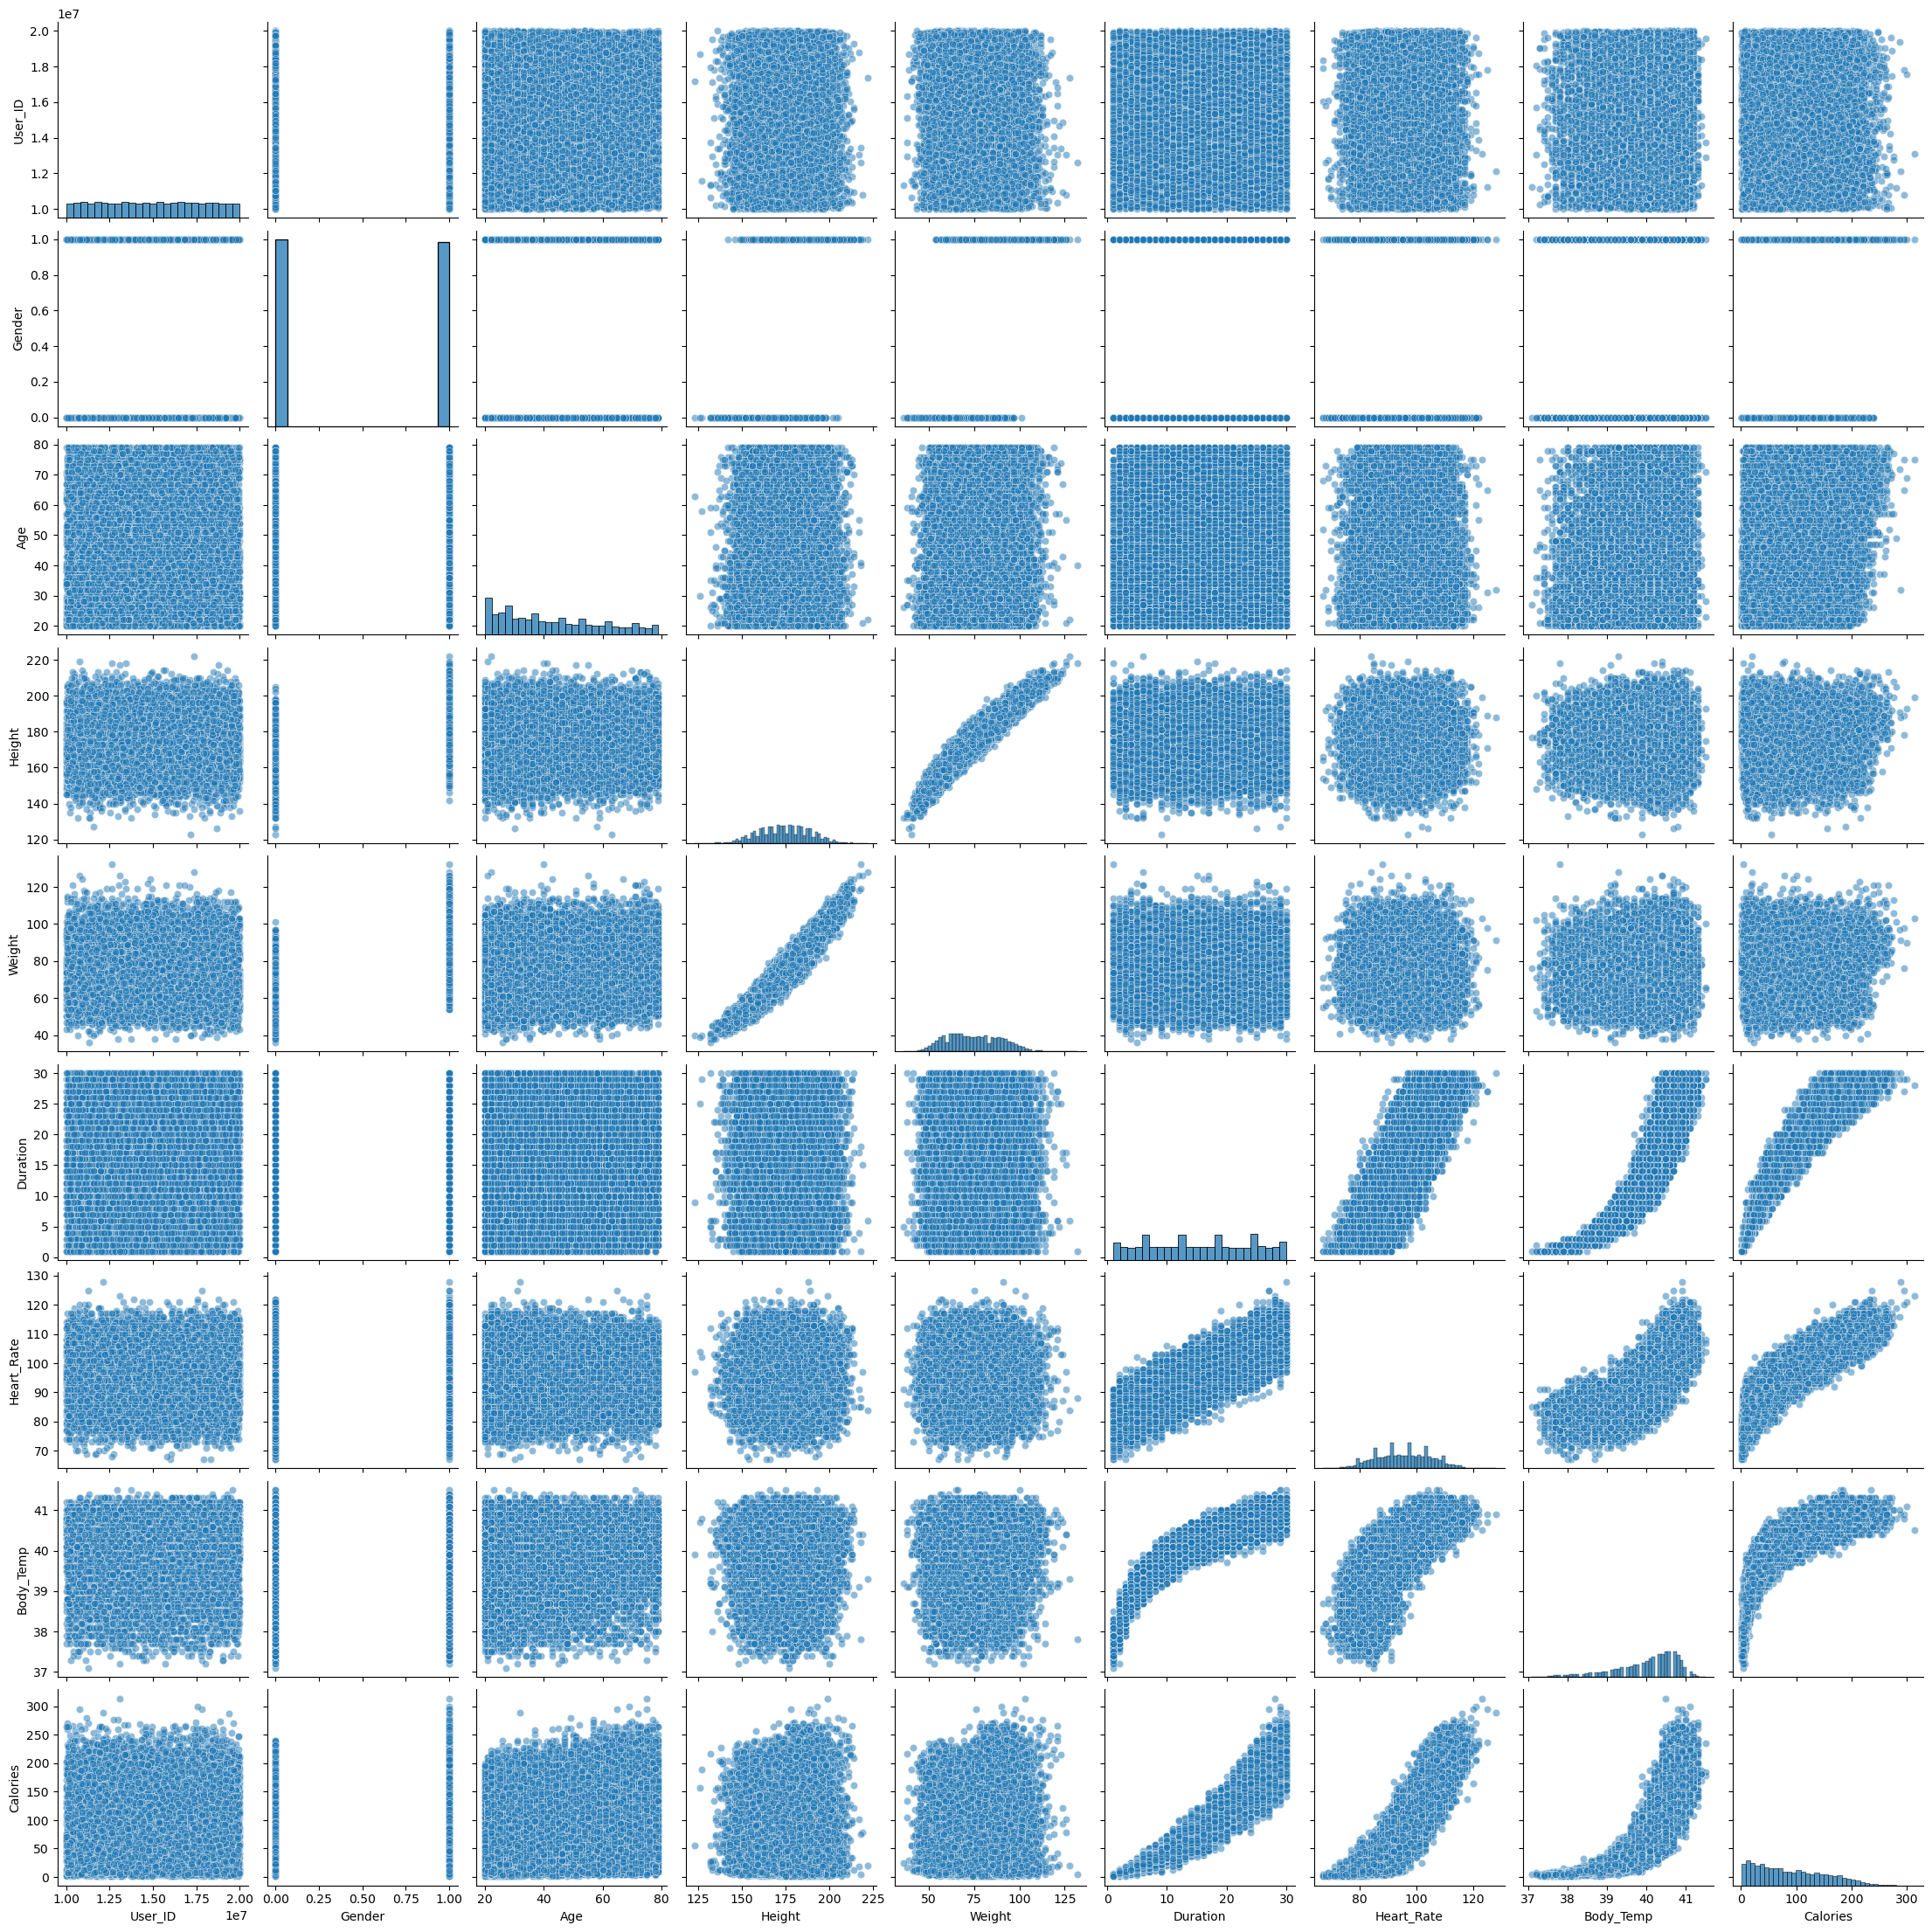

In [44]:
sns.pairplot(Calories_data, kind='scatter', plot_kws={'alpha': 0.5})
plt.show()

In [67]:

x = Calories_data.drop(['Calories','User_ID'], axis=1)
y = Calories_data['Calories']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [76]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [77]:
model.coef_
co=pf=pd.DataFrame(model.coef_,x.columns,columns=['coef'])

In [78]:
y_pred=model.predict(x_test)

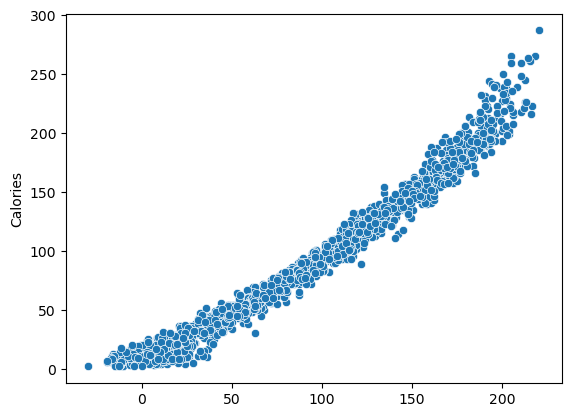

In [79]:
sns.scatterplot(x=y_pred,y=y_test)
plt.show()

<Axes: xlabel='Calories', ylabel='Count'>

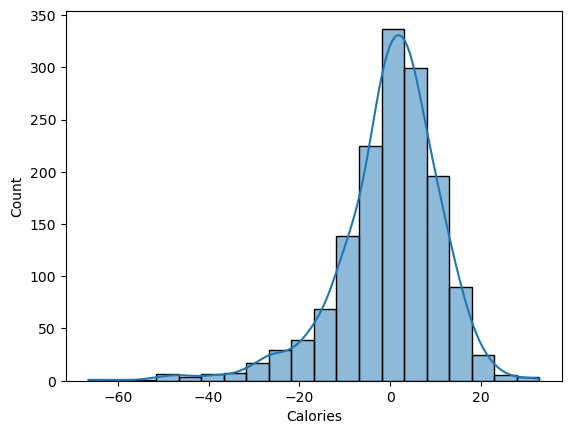

In [72]:
residual=y_pred - y_test
sns.histplot(residual,kde=True,bins=20)

((array([-3.31270533, -3.05604344, -2.91334469, ...,  2.91334469,
          3.05604344,  3.31270533]),
  array([-66.44639007, -60.40744397, -53.89805637, ...,  29.70649048,
          32.68040627,  32.88192322])),
 (11.02102629201364, -0.17617540188749134, 0.966351899299997))

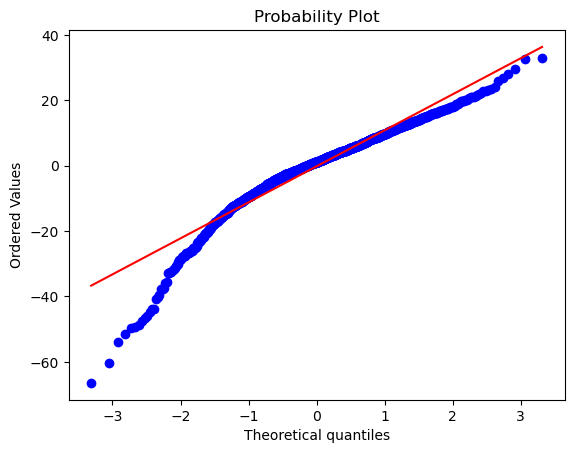

In [73]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist='norm',plot=pylab)

In [74]:
mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
r2s=r2_score(y_pred,y_test)

In [75]:
print(mse)
print(mae)
print(r2s)

129.59429728799708
8.23702940202457
0.9650107716120124


In [80]:
import joblib
joblib.dump(model, 'caloriesModel.pkl')  


['caloriesModel.pkl']